<a href="https://colab.research.google.com/github/ANISDBH/libsense/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import sys
import sklearn
import keras
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from tensorflow.python.keras.utils.np_utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, accuracy_score

The dataset, accessible through the University of California, Irvine Machine Learning repository via this URL: http://archive.ics.uci.edu/ml/datasets/Heart+Disease, compiles patient data
sourced from various locations worldwide. Comprising 76 attributes like age, sex, resting blood pressure,
cholesterol levels, echocardiogram data, and exercise habits, we’ll focus on a subset of 14 attributes used
in prior studies, specifically from data collected at the Cleveland Clinic Foundation.

Shape of the data is  (303, 14)
age          63.0
sex           1.0
cp            1.0
trestbps    145.0
chol        233.0
fbs           1.0
restecg       2.0
thalach     150.0
exang         0.0
oldpeak       2.3
slope         3.0
ca            0.0
thal          6.0
class           0
Name: 0, dtype: object
age          67.0
sex           1.0
cp            4.0
trestbps    160.0
chol        286.0
fbs           0.0
restecg       2.0
thalach     108.0
exang         1.0
oldpeak       1.5
slope         2.0
ca            3.0
thal          3.0
class           2
Name: 1, dtype: object
age          67.0
sex           1.0
cp            4.0
trestbps    120.0
chol        229.0
fbs           0.0
restecg       2.0
thalach     129.0
exang         1.0
oldpeak       2.6
slope         2.0
ca            2.0
thal          7.0
class           1
Name: 2, dtype: object
age          37.0
sex           1.0
cp            3.0
trestbps    130.0
chol        250.0
fbs           0.0
restecg       0.0
thalach     187.0

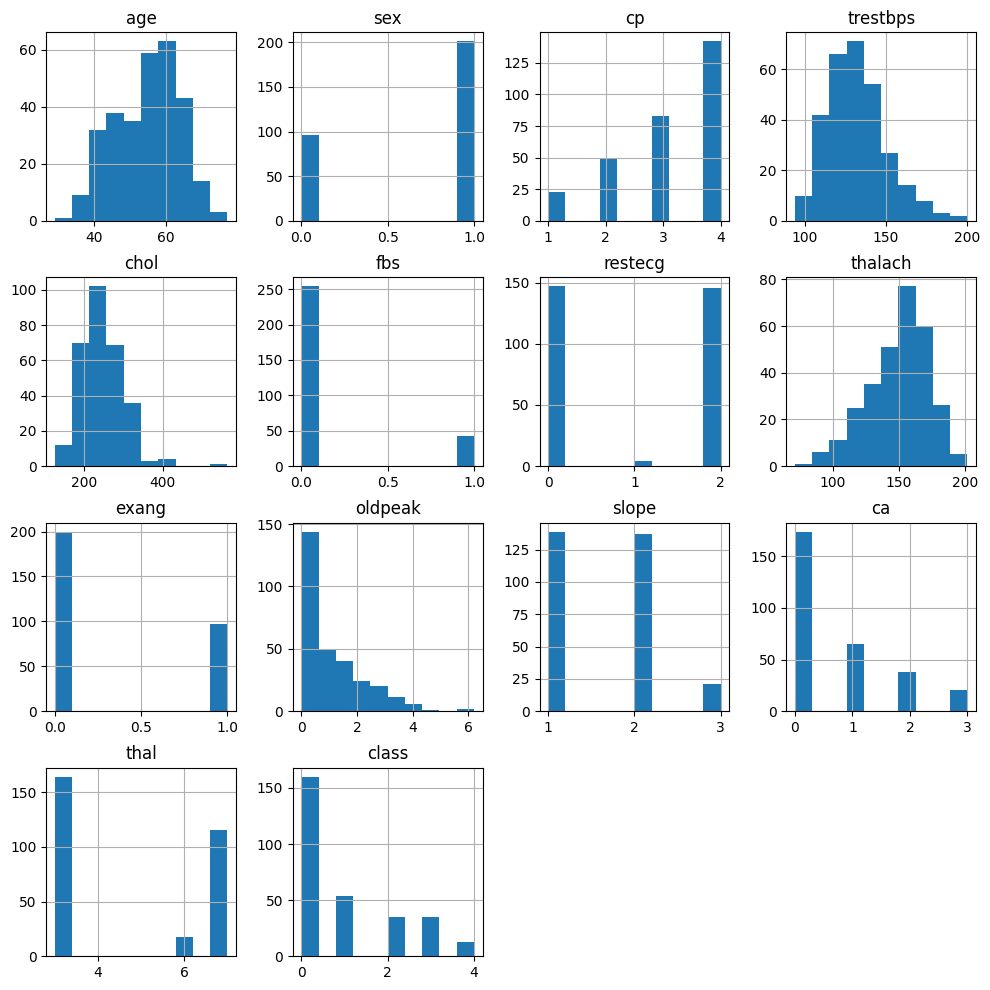

In [8]:
# import data

lien = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
names = ['age',
        'sex',
        'cp',
        'trestbps',
        'chol',
        'fbs',
        'restecg',
        'thalach',
        'exang',
        'oldpeak',
        'slope',
        'ca',
        'thal',
        'class']
data = pd.read_csv(lien,names=names)
print ('Shape of the data is ', data.shape)
i = 0
for i in range(10) :
    print (data.loc[i])

print (data.loc[250:])
dataa = data[~data.isin(['?'])]
print (dataa.loc[250:])
dataa = dataa.dropna(axis=0)
print (dataa.loc[250:])

print (dataa.shape)
print (dataa.dtypes)

dataa = dataa.apply(pd.to_numeric)
print (dataa)
print (dataa.dtypes)
print (dataa.describe())

dataa.hist(figsize = (12,12))
plt.show()

Creating Training and Testing Datasets: After suitable data preprocessing, we’ll split it into training (80%)
and testing (20%) datasets using Sklearn’s train_test_split() function.

In [66]:
X = np.array(dataa.drop(['class'], 1))
y = dataa['class']

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)

# convert the data to categorical labels

encoder = OneHotEncoder(sparse=False)
Y_train = encoder.fit_transform(y_train.values.reshape(-1, 1))
Y_test = encoder.fit_transform(y_test.values.reshape(-1, 1))
#Y_train = to_categorical(y_train, num_classes=None)
#Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(237, 5)
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


<ipython-input-66-babf98bec89f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataa.drop(['class'], 1))
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Building and Training the Neural Network: With processed and segregated data, the neural network construction begins. Utilizing Keras, a simple neural network with a hidden layer will address this classification
task. Employing a softmax activation function and divers method of optimzation in the final layer and categorical cross-entropy loss during training suits this categorical classification problem

In [67]:
def createmodel() :
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    #model.add(Dropout(0.25))
    model.add(Dense(32, activation='relu'))
    #model.add(Dropout(0.25))
    #model.add(Dense(5, activation='softmax'))
    model.add(Dense(5, activation='sigmoid'))
    #model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    #model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = createmodel()

print (model.summary())



Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 64)                896       
                                                                 
 dense_55 (Dense)            (None, 32)                2080      
                                                                 
 dense_56 (Dense)            (None, 5)                 165       
                                                                 
Total params: 3141 (12.27 KB)
Trainable params: 3141 (12.27 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [68]:
Training = model.fit(X_train,Y_train,validation_data=(X_test, Y_test) ,batch_size=10,epochs=100,verbose=1)

Epoch 1/100
24/24 [==============================] - 1s 11ms/step - loss: 13.8876 - accuracy: 0.3671 - val_loss: 7.9447 - val_accuracy: 0.2333
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 4.5504 - accuracy: 0.3629 - val_loss: 2.7412 - val_accuracy: 0.4167
Epoch 3/100
24/24 [==============================] - 0s 4ms/step - loss: 1.9767 - accuracy: 0.4852 - val_loss: 2.6442 - val_accuracy: 0.4333
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 1.8629 - accuracy: 0.4473 - val_loss: 2.3215 - val_accuracy: 0.3333
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 1.6459 - accuracy: 0.5063 - val_loss: 2.3668 - val_accuracy: 0.4333
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 1.5577 - accuracy: 0.5232 - val_loss: 2.0835 - val_accuracy: 0.4500
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 1.3567 - accuracy: 0.5316 - val_loss: 1.6866 - val_accuracy: 0.4667
Epoch 8/100

Improving Results - Binary Classification Despite promising results, there's room for improvement, possibly due to the complexity of distinguishing between various severity levels of heart disease (classes 1 - 4). To simplify, we'll transform the data into a binary classification problem: heart disease or no heart disease.

In [51]:
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

print (Y_train_binary)

177    1
228    1
217    0
191    1
282    1
      ..
6      1
14     0
18     0
91     1
12     1
Name: class, Length: 237, dtype: int64


In [64]:
from keras.layers import Dropout
from keras import regularizers
def createmodel_b() :
    model_binary = Sequential()
    model_binary.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    #model_binary.add(Dropout(0.25))
    model_binary.add(Dense(32, activation='relu'))
    #model_binary.add(Dropout(0.25))
    model_binary.add(Dense(1, activation='sigmoid'))
    #model_binary.add(Dense(1, activation='softmax'))
    #model_binary.compile(loss='binary_crossentropy', optimizer='adagrad', metrics=['accuracy'])
    #model_binary.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    model_binary.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model_binary

model_binary = createmodel_b()

print (model_binary.summary())



Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 64)                896       
                                                                 
 dense_52 (Dense)            (None, 32)                2080      
                                                                 
 dense_53 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [65]:
Training_binary = model_binary.fit(X_train,Y_train_binary,validation_data=(X_test, Y_test_binary),batch_size=10,epochs=100,verbose=1)

Epoch 1/100
24/24 [==============================] - 1s 10ms/step - loss: 1.4258 - accuracy: 0.4979 - val_loss: 0.7913 - val_accuracy: 0.5833
Epoch 2/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6549 - accuracy: 0.6371 - val_loss: 0.7130 - val_accuracy: 0.6667
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5756 - accuracy: 0.7300 - val_loss: 0.6099 - val_accuracy: 0.7333
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6826 - accuracy: 0.6414 - val_loss: 0.8939 - val_accuracy: 0.5500
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5744 - accuracy: 0.7384 - val_loss: 0.8388 - val_accuracy: 0.5667
Epoch 6/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5502 - accuracy: 0.7131 - val_loss: 0.6799 - val_accuracy: 0.7167
Epoch 7/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5298 - accuracy: 0.7511 - val_loss: 0.6338 - val_accuracy: 0.7333
Epoch 8/100


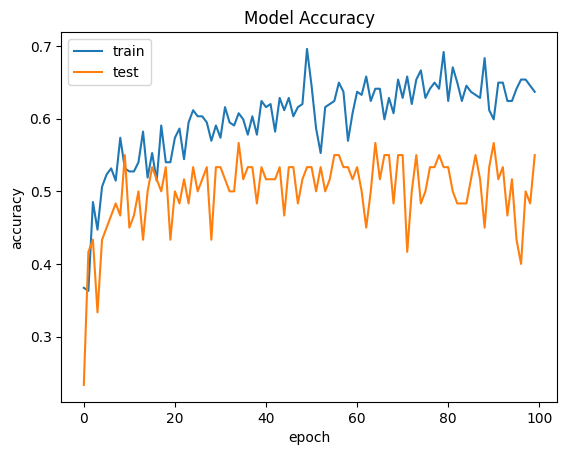

In [69]:
plt.plot(Training.history['accuracy'])
plt.plot(Training.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

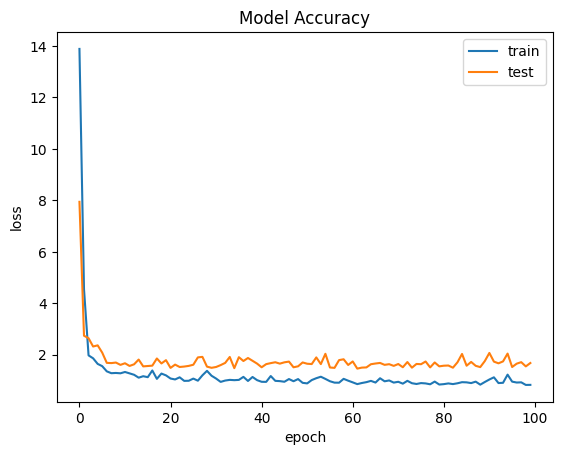

In [70]:
plt.plot(Training.history['loss'])
plt.plot(Training.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

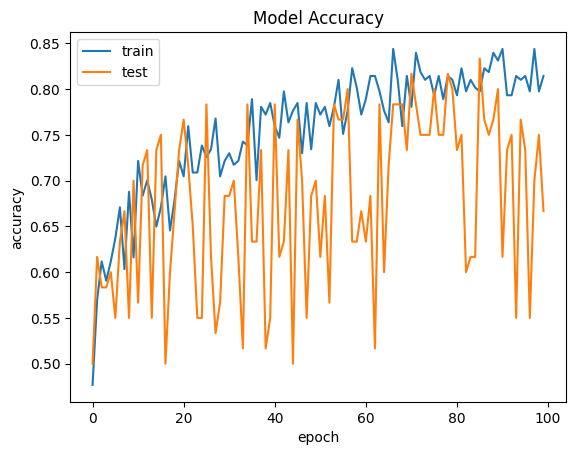

In [48]:
plt.plot(Training_binary.history['accuracy'])
plt.plot(Training_binary.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

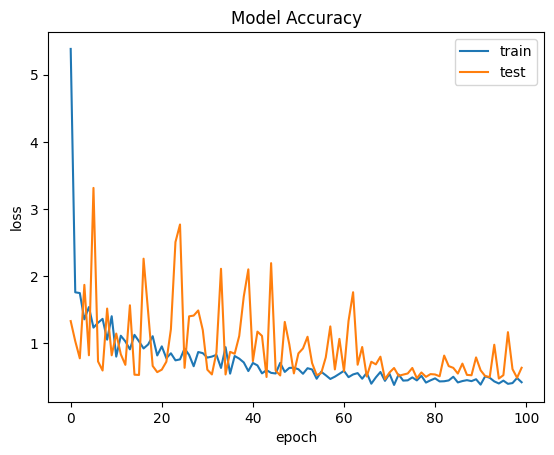

In [53]:
plt.plot(Training_binary.history['loss'])
plt.plot(Training_binary.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

Results and Metrics while accuracy results on training data are insightful, the model's generalization ability on unseen test data is critical. To assess this, predictions will be made on both the training and testing datasets. Using Sklearn, performance metrics will be computed to evaluate the categorical and binary models' effectiveness.

In [71]:
Prediction1 = np.argmax(model.predict(X_test), axis=1)
print('Results for Categorical Model')
print(accuracy_score(y_test, Prediction1 ))
print(classification_report(y_test, Prediction1 ))

2/2 [==============================] - 0s 7ms/step
Results for Categorical Model
0.55
              precision    recall  f1-score   support

           0       0.74      0.97      0.84        29
           1       0.00      0.00      0.00        11
           2       1.00      0.08      0.15        12
           3       0.19      1.00      0.32         4
           4       0.00      0.00      0.00         4

    accuracy                           0.55        60
   macro avg       0.39      0.41      0.26        60
weighted avg       0.57      0.55      0.46        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
Prediction_B = np.round(model_binary.predict(X_test)).astype(int)
print('Results for Binary Model')
print(accuracy_score(Y_test_binary, Prediction_B))
print(classification_report(Y_test_binary, Prediction_B))

2/2 [==============================] - 0s 9ms/step
Results for Binary Model
0.7333333333333333
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        33
           1       0.74      0.63      0.68        27

    accuracy                           0.73        60
   macro avg       0.73      0.72      0.73        60
weighted avg       0.73      0.73      0.73        60

